In [1]:
%matplotlib notebook
import os
import time
import numpy as np
import csv
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# from load_from_coords_1 import align_if_not_aligned_yet
# from classes.Settings import Settings
# from calc_avg_fragment_2 import read_results_alignment, make_avg_fragment_if_not_exists

from helpers.geometry_helpers import make_coordinate_df
from helpers.density_helpers import prepare_df

central_groups = ["H2O"] #["RCOMe", "RNO2", "H2O", "ArCI", "NO3", "RC6F5", "RC6H5"] #,
contact_groups = ["CF", "RCN", "R2CO", "XH", "CCH3", "C2CH2", "RC6H5", "ArCH"] #  
to_count =       ["F",   "N",    "O",   "H",   "H",     "H", "centroid", "H"]
resolutions = np.arange(0.1, 1.1, 0.1)

ModuleNotFoundError: No module named 'load_from_coords_1'

# Count the structures

In [2]:
count = True
counts = []

if count:
    for central_group in central_groups:

        for to_count_contact, contact_group in zip(to_count, contact_groups):
            datafile = ".\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"

            ids = []

            with open(datafile, 'r') as resultsFile:
                line = "hoi"
                while line:
                    line = resultsFile.readline()
                    if "**" in line:
                        ids.append(line.split("**")[0])

                print(central_group, contact_group, len(ids), len(set(ids)))
                counts.append(len(ids))

H2O CF 3775 1208
H2O RCN 6886 2335
H2O R2CO 106727 30635
H2O XH 559303 56792
H2O CCH3 20864 8006
H2O C2CH2 19979 8122
H2O RC6H5 16231 5184
H2O ArCH 23145 9803


# Data Gathering

In [3]:
run_everything_again = True

if run_everything_again:
    with open('coordinate_df_.csv', 'a', newline='') as resultsfile:
        writer = csv.writer(resultsfile)
        writer.writerow(['central', 'contact', 'to_count', 'alignment', 'avg_fragment', 'coordinate_df'])

        for central_group in central_groups:
            for to_count_contact, contact_group in zip(to_count, contact_groups):
                print(central_group, contact_group, to_count_contact)

                datafile = ".\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
                result1 = ".\\results\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5\\"\
                          + central_group + "_" + contact_group + "_vdw.5_aligned.csv"

                settings = Settings(datafile)
                settings.set_atom_to_count(to_count_contact)

                starttime = time.time()
                align_if_not_aligned_yet(settings, datafile)
                alignment_time = time.time() - starttime

                aligned_fragments_df = read_results_alignment(settings.get_aligned_csv_filename())
                avg_fragment = make_avg_fragment_if_not_exists(settings, aligned_fragments_df)
                avg_fragment_time = time.time() - starttime - alignment_time

                df = aligned_fragments_df[~aligned_fragments_df.in_central_group]
                coordinate_df = make_coordinate_df(df, settings, avg_fragment)
                coordinate_df_time = time.time() - starttime - avg_fragment_time

                writer.writerow([central_group, contact_group, to_count_contact, alignment_time, avg_fragment_time, coordinate_df_time])

100%|████████████████████████████████████████████████████████████████████████| 22650/22650 [00:00<00:00, 196100.70it/s]

H2O CF F
Reading fragments from .cor file
Aligning fragments and writing result to csv


  6%|████▎                                                                        | 212/3775 [00:00<00:03, 1030.49it/s]

100%|█████████████████████████████████████████████████████████████████████████████| 3775/3775 [00:03<00:00, 974.55it/s]


H2O
Searching for nearest atom from contact group...
3775


 32%|██████████████████████▉                                                 | 13146/41316 [00:00<00:00, 130505.52it/s]

Done
H2O RCN N
Reading fragments from .cor file


  3%|██▏                                                                           | 195/6886 [00:00<00:07, 943.27it/s]

Aligning fragments and writing result to csv


100%|████████████████████████████████████████████████████████████████████████████| 6886/6886 [00:06<00:00, 1037.37it/s]


H2O
Searching for nearest atom from contact group...
6886
Done
H2O R2CO O


  1%|▊                                                                        | 7185/640362 [00:00<00:08, 71306.89it/s]

Reading fragments from .cor file


  0%|                                                                             | 93/106727 [00:00<01:55, 922.87it/s]

Aligning fragments and writing result to csv


100%|█████████████████████████████████████████████████████████████████████████| 106727/106727 [01:54<00:00, 934.66it/s]


H2O
Searching for nearest atom from contact group...
106727
Done
H2O XH H


  0%|                                                                        | 2698/3355818 [00:00<02:31, 22173.86it/s]

Reading fragments from .cor file


  0%|                                                                             | 66/559303 [00:00<14:22, 648.50it/s]

Aligning fragments and writing result to csv


100%|█████████████████████████████████████████████████████████████████████████| 559303/559303 [15:11<00:00, 613.60it/s]


H2O
Searching for nearest atom from contact group...
559303


 17%|████████████▏                                                          | 32185/187776 [00:00<00:00, 319517.71it/s]

Done
H2O CCH3 H
Reading fragments from .cor file


  0%|▎                                                                             | 91/20864 [00:00<00:23, 903.04it/s]

Aligning fragments and writing result to csv


100%|███████████████████████████████████████████████████████████████████████████| 20864/20864 [00:24<00:00, 863.60it/s]


H2O
Searching for nearest atom from contact group...
62592


 16%|███████████                                                            | 27880/179811 [00:00<00:00, 276436.16it/s]

Done
H2O C2CH2 H
Reading fragments from .cor file


  1%|▌                                                                            | 159/19979 [00:00<00:25, 780.78it/s]

Aligning fragments and writing result to csv


100%|███████████████████████████████████████████████████████████████████████████| 19979/19979 [00:24<00:00, 819.49it/s]


H2O
Searching for nearest atom from contact group...
39958


 10%|███████▏                                                               | 26375/259696 [00:00<00:00, 261837.49it/s]

Done
H2O RC6H5 centroid
Reading fragments from .cor file


  0%|▎                                                                             | 63/16231 [00:00<00:25, 625.53it/s]

Aligning fragments and writing result to csv


100%|███████████████████████████████████████████████████████████████████████████| 16231/16231 [00:24<00:00, 675.54it/s]


H2O
Searching for nearest atom from contact group...
16231


  0%|                                                                                       | 0/300885 [00:00<?, ?it/s]

Done
H2O ArCH H
Reading fragments from .cor file


  0%|▏                                                                             | 59/23145 [00:00<00:39, 580.16it/s]

Aligning fragments and writing result to csv


100%|███████████████████████████████████████████████████████████████████████████| 23145/23145 [00:34<00:00, 678.16it/s]


H2O
Searching for nearest atom from contact group...
69435
Done


# Analyzing data

In [ ]:
df = pd.read_csv('results/density_comp_time1.csv')
df["count"] = counts[:-2]
display(df)

In [ ]:
for central_group in central_groups:
    print(central_group)
    bars1 = df[df.central == central_group]['alignment']
    bars2 = df[df.central == central_group]['avg_fragment']
    bars3 = df[df.central == central_group]['coordinate_df']
        
    bar_width = 0.25  # the width of the bars
    r1 = np.arange(len(bars1))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # make that plot
    fig, ax = plt.subplots(figsize=(6,4))
    rects1 = ax.bar(r1, bars1, bar_width, label='Alignment')
    rects2 = ax.bar(r2, bars2, bar_width, label='avg_fragment')
    rects3 = ax.bar(r3, bars3, bar_width, label='coordinate_df')

    ax.set_xticks([r + bar_width for r in range(len(bars1))])
    ax.set_xticklabels(df[df.central == central_group]['contact'])
    
    plt.title('Prep comp times ' + central_group)
    
    plt.legend()
    
    plt.savefig("results/figures/Prep_times_" + central_group + ".svg", format="svg")
    plt.show()

In [ ]:
# sort df
df["total"] = df["alignment"] + df["avg_fragment"] + df["coordinate_df"]
df = df.sort_values("total", ascending=False)

In [ ]:
i = 0
r1 = []
xtick_labels = []

fig, ax = plt.subplots(figsize=(9,5))
    
for _, row in df.iterrows():
    bars1 = row['alignment']
    bars2 = row['avg_fragment']
    bars3 = row['coordinate_df']
        
    bar_width = 0.5  # the width of the bars
    r1.append(i)

    # make that plot
    rects1 = plt.bar(i, bars1, bar_width, color="tab:blue")
    rects2 = plt.bar(i, bars2, bar_width, bottom=bars1, color="tab:orange")
    rects3 = plt.bar(i, bars3, bar_width, bottom=bars1+bars2, color="tab:green")

    xtick_labels.append(row["central"] + "-" + row['contact'])
    i+=1


    
plt.xticks(r1, xtick_labels, rotation=90)

plt.title('Prep comp times')
plt.subplots_adjust(bottom=0.3)

ax.set_xlabel("Pair")
ax.set_ylabel("Computational time (s)")

ax2 = ax.twinx()
ax2.set_ylabel("Amount")

line = ax2.plot(range(len(df)), df["count"], color="red", label="no unique fragments")

plt.legend((rects1[0], rects2[0], rects3[0], line[0]), ('alignment', 'avg_fragment', 'coordinate_df', 'No. fragments'))

plt.savefig("results/figures/Prep_times_total.svg", format="svg")

plt.show()

In [ ]:
jit_df = pd.read_csv('coordinate_df_jit.csv')


combined = pd.merge(jit_df, df,  how='left', left_on=['contact','central', 'to_count'], right_on = ['contact','central', 'to_count', ])

combined["total_jit"] = combined["alignment"] + combined["avg_fragment"] + combined["coordinate_df_jit"]
combined = combined.sort_values("total", ascending=False)

combined["diff"] = combined["coordinate_df"] - combined["coordinate_df_jit"]

In [ ]:
i = 0
r1 = []
xtick_labels = []

fig, ax = plt.subplots(figsize=(9,5))
    
for _, row in combined.iterrows():
    bars1 = row['alignment']
    bars2 = row['avg_fragment']
    bars3 = row['coordinate_df_jit']
        
    bar_width = 0.5  # the width of the bars
    r1.append(i)

    # make that plot
    rects1 = plt.bar(i, bars1, bar_width, color="tab:blue")
    rects2 = plt.bar(i, bars2, bar_width, bottom=bars1, color="tab:orange")
    rects3 = plt.bar(i, bars3, bar_width, bottom=bars1+bars2, color="tab:green")

    xtick_labels.append(row["central"] + "-" + row['contact'])
    i+=1


    
plt.xticks(r1, xtick_labels, rotation=90)

plt.title('Prep comp times')
plt.subplots_adjust(bottom=0.3)

ax.set_xlabel("Pair")
ax.set_ylabel("Computational time (s)")

ax2 = ax.twinx()
ax2.set_ylabel("Amount")

line = ax2.plot(range(len(df)), df["count"], color="red", label="no unique fragments")

plt.legend((rects1[0], rects2[0], rects3[0], line[0]), ('alignment', 'avg_fragment', 'coordinate_df_jit', 'No. fragments'))

plt.savefig("results/figures/Prep_times_total.svg", format="svg")

plt.show()

# some code to check if labels are the same in the fragments of all the pairs

In [4]:
central_group = "RC6F5"
    
def plot_fragment_with_labels(central_group, contact_group):
    datafile = "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
    csvfile =  "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.csv"

    fp = open(csvfile)
    labels = fp.readline().strip().split(',')
    atoms = fp.readline().strip().split(',')
    fp.close()

    to_delete = []
    for i in range(len(labels)):
        if not "LAB" in labels[i]:
            to_delete.append(i)

    for i in reversed(to_delete):
        del labels[i]
        del atoms[i]

    fp = open(datafile)
    line = fp.readline()
    line = fp.readline()

    firstfragment = True
    dictionary = {}

    while firstfragment:                 
        information = line.split()
        x, y, z = float(information[1]), float(information[2]), float(information[3])
        dictionary[information[0].strip("%")] = [x,y,z]

        line = fp.readline()
        if "**FRAG**" in line:
            firstfragment = False

    fp.close()

    print(atoms)
    print(dictionary)

    fig = plt.figure()
    ax: Axes3D = fig.add_subplot(111, projection='3d')

    for i, atom in enumerate(atoms):
        x,y,z = dictionary[atom][0], dictionary[atom][1], dictionary[atom][2]

        if 'R' in atom:
            color = 'green'
            label = 'R'
        elif 'H' in atom:
            color = 'grey'
            label = 'H'
        elif 'O' in atom:
            color='red'
            label = 'O'
        elif 'F' in atom:
            color='orchid'
            label = 'F'
        elif 'N' in atom:
            color='blue'
            label = 'N'
        else:
            color = 'black'
            label ='C'

        ax.scatter(x,y,z, color=color)

        ax.text(x+0.01, y+0.01, z+0.01, labels[i])

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.title(central_group + "-" + contact_group)
    plt.show()

['C37', 'C35', 'C39', 'C34', 'C36', 'C38', 'F19', 'F20', 'F18', 'F17', 'F16', 'B1']
{'C34': [4.30817, 7.73501, 4.08624], 'C35': [4.68637, 9.04057, 3.79641], 'C36': [5.18838, 9.92791, 4.73394], 'C37': [5.29288, 9.54989, 6.05084], 'C38': [4.87994, 8.28662, 6.41533], 'C39': [4.39085, 7.43546, 5.44336], 'B1': [3.72228, 6.57818, 3.05752], 'F16': [4.58948, 9.53792, 2.54288], 'F17': [5.57599, 11.16386, 4.36202], 'F18': [5.78434, 10.39168, 6.97046], 'F19': [4.9678, 7.8896, 7.69696], 'F20': [4.00548, 6.2163, 5.87369], 'C40': [1.25216, 10.77061, 4.9976], 'C41': [2.02462, 11.89101, 4.61465], 'C42': [2.4774, 12.55075, 5.99767], 'H38': [2.81161, 11.61231, 4.08114], 'H39': [1.48476, 12.52638, 4.07971]}


<IPython.core.display.Javascript object>


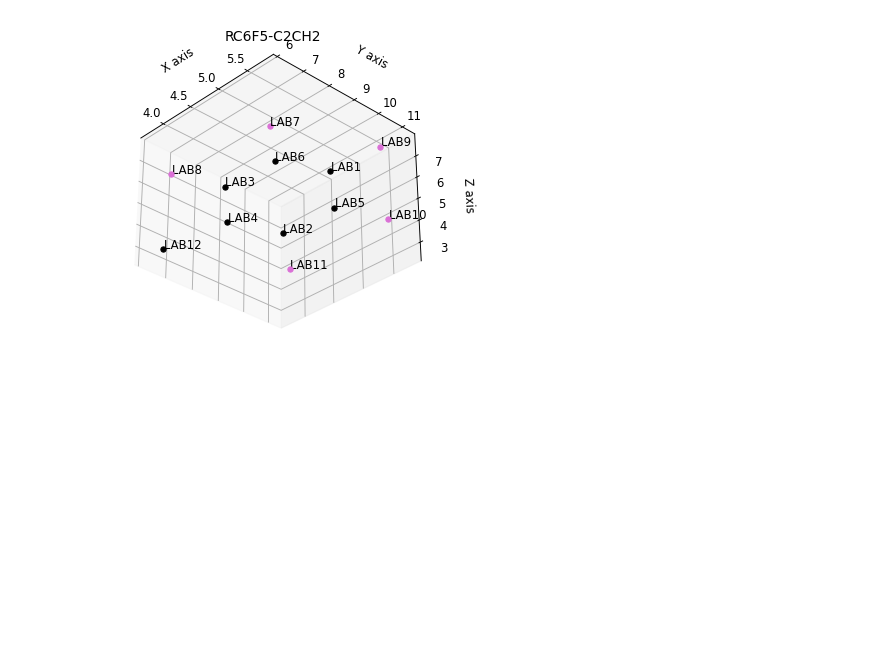

In [5]:
plot_fragment_with_labels(central_group="RC6F5", contact_group="C2CH2")